In [1]:
import pickle
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
df_dict = pickle.load(open('./df_dict.pkl', 'rb'))
iaz_list = list(df_dict.keys())

In [3]:
df_dict[iaz_list[0]].head()

,InstanceType,Region,AvailabilityZoneId,Score,Frequency,Price,TimeStamp_sps,TimeStamp_spotinfo
i-az,,,,,,,,
a1.2xlarge_apne1-az2,a1.2xlarge,ap-northeast-1,apne1-az2,3,1,0.069,2021-11-23 00:12:08+00:00,2021-11-23 00:08:16+00:00
a1.2xlarge_apne1-az2,a1.2xlarge,ap-northeast-1,apne1-az2,3,1,0.069,2021-11-23 00:22:03+00:00,2021-11-23 00:18:16+00:00
a1.2xlarge_apne1-az2,a1.2xlarge,ap-northeast-1,apne1-az2,3,1,0.069,2021-11-23 00:31:56+00:00,2021-11-23 00:28:16+00:00
a1.2xlarge_apne1-az2,a1.2xlarge,ap-northeast-1,apne1-az2,3,1,0.069,2021-11-23 00:41:59+00:00,2021-11-23 00:38:15+00:00
a1.2xlarge_apne1-az2,a1.2xlarge,ap-northeast-1,apne1-az2,3,1,0.069,2021-11-23 00:51:59+00:00,2021-11-23 00:48:15+00:00


### 01. Calculate Correlation between Two Columns

In [4]:
# calcaulte correlation

iaz_statistic_dict = {}

for iaz in tqdm(iaz_list):
    iaz_df = df_dict[iaz]
    sps_fs_corr = iaz_df[['Score', 'Frequency']].corr()['Score'].loc['Frequency']
    fs_price_corr = iaz_df[['Frequency', 'Price']].corr()['Frequency'].loc['Price']
    sps_price_corr = iaz_df[['Score', 'Price']].corr()['Score'].loc['Price']
    
    iaz_statistic_dict[iaz] = [sps_fs_corr, fs_price_corr, sps_price_corr]

100%|██████████| 14904/14904 [01:00<00:00, 245.48it/s]


### 02. Time-series Visualization

In [5]:
def time_vis(iaz):
    cond_df = df_dict[iaz].sort_values(by='TimeStamp_spotinfo').reset_index()
    
    fig, ax1 = plt.subplots()    
    fig.set_figheight(7)
    fig.set_figwidth(15)
    
    ax1.plot(cond_df['Score'], label='SPS', color='tab:red')
    ax1.set_ylim((0, 4))
    ax1.set_ylabel('SPS')
    
    ax2 = ax1.twinx()
    ax2.plot(cond_df['Price'], label='Price', color='tab:blue')
    
    ax3 = ax1.twinx()
    ax3.plot(cond_df['Frequency'], label='FS', color='tab:green')
    ax3.set_ylim((0, 6))
    ax3.set_ylabel('\n\nPrice & FS')

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines3, labels3 = ax3.get_legend_handles_labels()
    ax3.legend(lines + lines2 + lines3, labels + labels2 + labels3,fontsize=10, loc=5)
    
    plt.show()

### 03. Positive Correlation Analysis

SPS - FS Correlation Positive Case
I-AZ: r5ad.24xlarge_usw1-az3 // Maximum Correlation: 0.9215798625904973


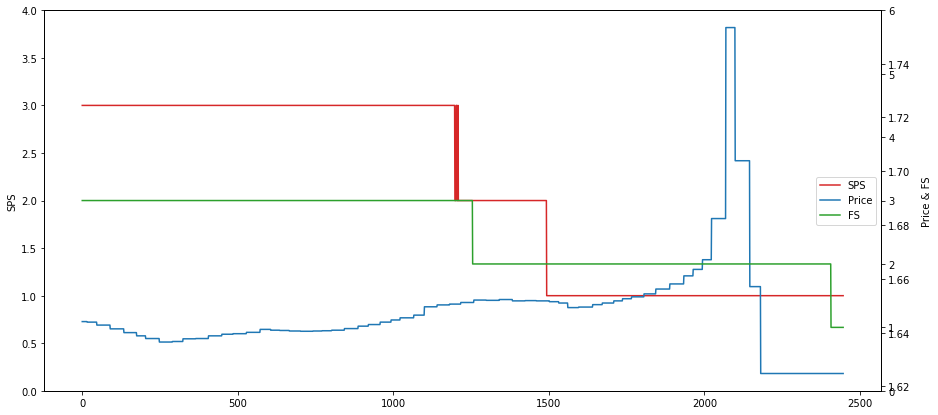

In [6]:
print("SPS - FS Correlation Positive Case")

max_iaz = ''
max_stat = 0
for iaz, stats in iaz_statistic_dict.items():
    if stats[0] > max_stat:
        max_stat = stats[0]
        max_iaz = iaz
        
print(f"I-AZ: {max_iaz} // Maximum Correlation: {max_stat}")
time_vis(max_iaz)

FS - Price Correlation Positive Case (minimum)
I-AZ: m5.2xlarge_euc1-az1 // Maximum Correlation: -0.9566794129277577


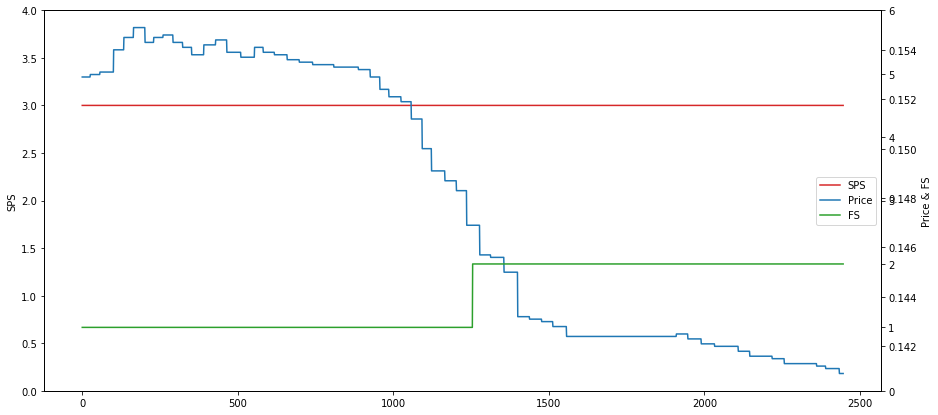

In [7]:
print("FS - Price Correlation Positive Case (minimum)")

min_iaz = ''
min_stat = 0
for iaz, stats in iaz_statistic_dict.items():
    if stats[1] < min_stat:
        min_stat = stats[1]
        min_iaz = iaz

print(f"I-AZ: {min_iaz} // Maximum Correlation: {min_stat}")
time_vis(min_iaz)

SPS - Price Correlation Positive Case (minimum)
I-AZ: r5ad.12xlarge_cac1-az1 // Maximum Correlation: -0.8589423622261371


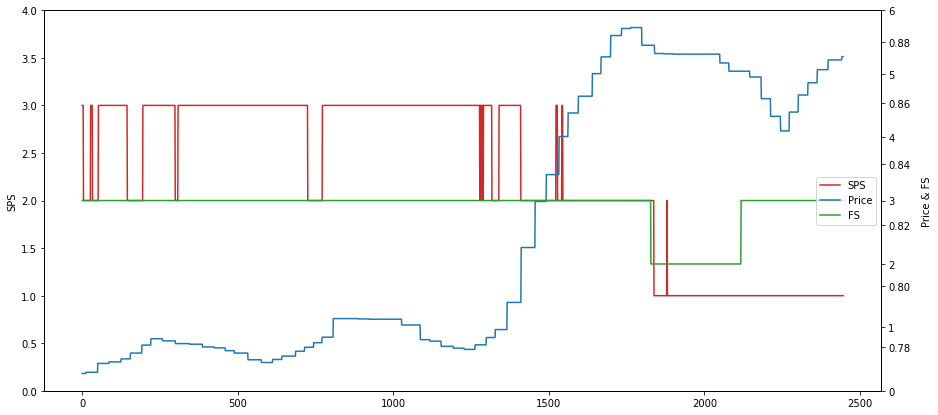

In [8]:
print("SPS - Price Correlation Positive Case (minimum)")

min_iaz = ''
min_stat = 0
for iaz, stats in iaz_statistic_dict.items():
    if stats[2] < min_stat:
        min_stat = stats[2]
        min_iaz = iaz

print(f"I-AZ: {min_iaz} // Maximum Correlation: {min_stat}")
time_vis(min_iaz)

### 04. Negative Correlation Analysis

SPS - FS Correlation Negative Case
I-AZ: c5n.metal_euc1-az2 // Maximum Correlation: -0.9753810615136134


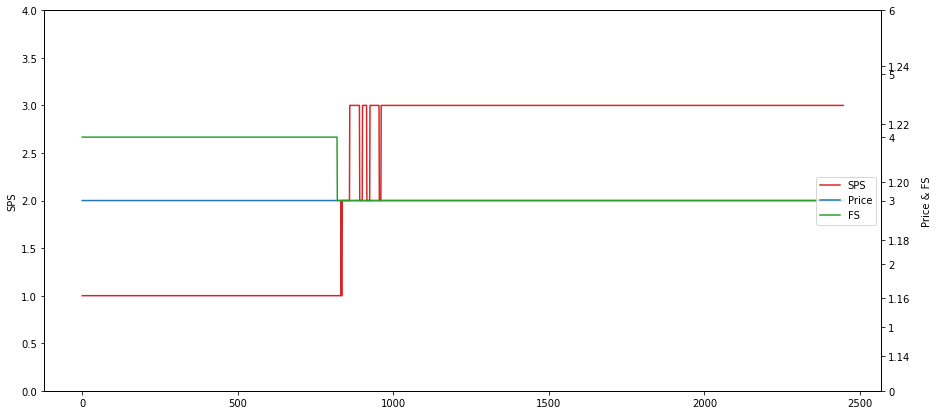

In [9]:
print("SPS - FS Correlation Negative Case")

min_iaz = ''
min_stat = 0
for iaz, stats in iaz_statistic_dict.items():
    if stats[0] < min_stat:
        min_stat = stats[0]
        min_iaz = iaz

print(f"I-AZ: {min_iaz} // Maximum Correlation: {min_stat}")
time_vis(min_iaz)

FS - Price Correlation Negative Case (maximum)
I-AZ: r3.xlarge_usw1-az1 // Maximum Correlation: 0.9295837948927868


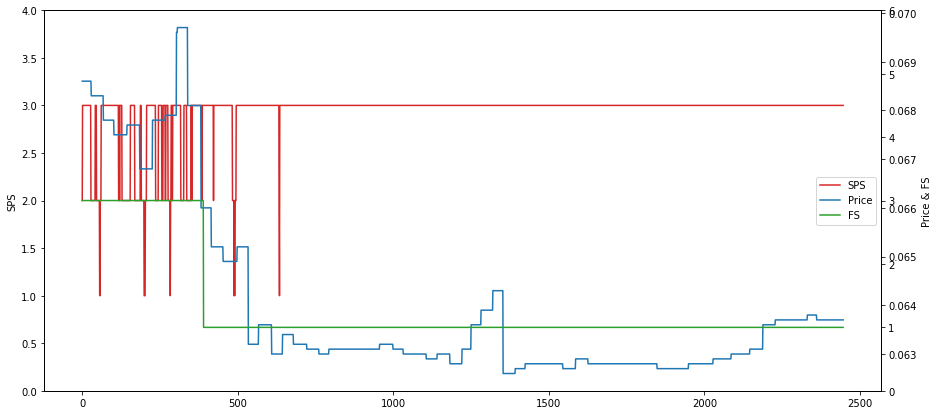

In [10]:
print("FS - Price Correlation Negative Case (maximum)")

max_iaz = ''
max_stat = 0
for iaz, stats in iaz_statistic_dict.items():
    if stats[1] > max_stat:
        max_stat = stats[1]
        max_iaz = iaz
        
print(f"I-AZ: {max_iaz} // Maximum Correlation: {max_stat}")
time_vis(max_iaz)

SPS - Price Correlation Negative Case (maximum)
I-AZ: r5n.16xlarge_usw2-az3 // Maximum Correlation: 0.9337317739128368


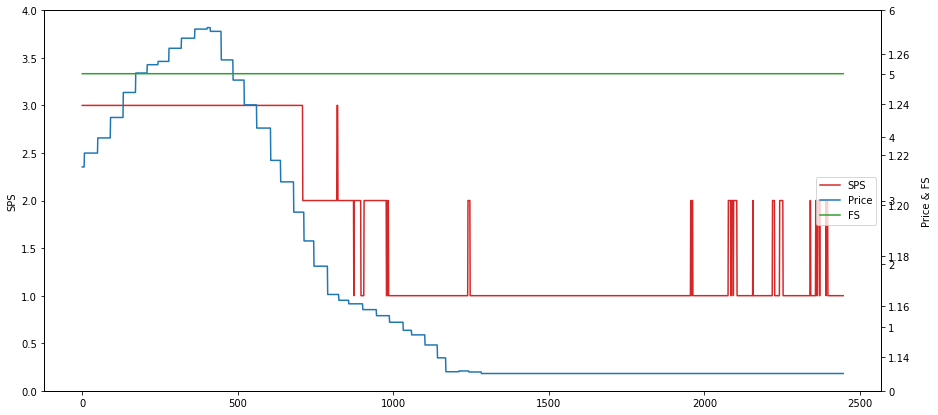

In [11]:
print("SPS - Price Correlation Negative Case (maximum)")

max_iaz = ''
max_stat = 0
for iaz, stats in iaz_statistic_dict.items():
    if stats[2] > max_stat:
        max_stat = stats[2]
        max_iaz = iaz
        
print(f"I-AZ: {max_iaz} // Maximum Correlation: {max_stat}")
time_vis(max_iaz)